In [1]:
import numpy as np
import pandas as pd

In [2]:
# the code is to detect the encoding inorder to red the file
import chardet
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

detected_encoding = detect_encoding('spam.csv')

In [3]:
df = pd.read_csv('spam.csv', encoding = (detected_encoding))

In [4]:
df.head(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#process for the project
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1.Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# As the 3 coluums didnot have the more data (i.e, Null value), So i ma deleting those cloumn
#droping the column (Inplace is to fixed the change)
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(10)

,v1,v2
63,ham,"Sorry my roommates took forever, it ok if I co..."
1955,ham,"Aight I'll grab something to eat too, text me ..."
1230,ham,I want to send something that can sell fast. ...
1084,ham,For me the love should start with attraction.i...
4796,spam,Santa calling! Would your little ones like a c...
3566,spam,Collect your VALENTINE'S weekend to PARIS inc ...
1812,ham,\Getting tickets 4 walsall tue 6 th march. My ...
5251,ham,"Yeah work is fine, started last week, all the ..."
4410,ham,Ya but it cant display internal subs so i gott...
3767,ham,Where are you call me.


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3591,ham,I anything lor...
5481,ham,Shall call now dear having food
1089,ham,Goodmorning today i am late for &lt;DECIMAL&g...
3277,ham,What happened in interview?
2788,ham,ÌÏ got wat to buy tell us then Ì_ no need to c...
2207,ham,Usually the body takes care of it buy making s...
612,ham,I have many dependents
2653,ham,Sorry da:)i was thought of calling you lot of ...
426,ham,aathi..where are you dear..
3442,ham,Your board is working fine. The issue of overh...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# Labeling the number for ham and spam email
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
# Ham label as 0
# Spam label as 1
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values (Checking of the missing value)
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates (Keeping the 1st value)
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

## 2. EDA (Exploratory data analysis)

## 1st I am going to check the percentage of spam and ham mail

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Counting of the value on target column (number of ham and spam me=ail)
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

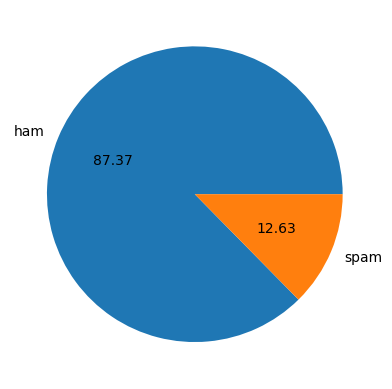

In [21]:
## plotting the the above % in pie chart, on pie chat i am showing in % so autopct
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
 # Data is imbalanced as per the pie chart.


In [23]:
import nltk

In [24]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aayush
[nltk_data]     Bhusal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
## calculating the numv=ber of character on the text for further analysis
#df['num_characters'] = df['text'].apply(lambda x: len(str(x)))
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head(10)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head(10)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [32]:
# Inorder to see what happening with these above count like avg
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# description of ham like above
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# description of spam like above
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
# plotting the analysis in histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

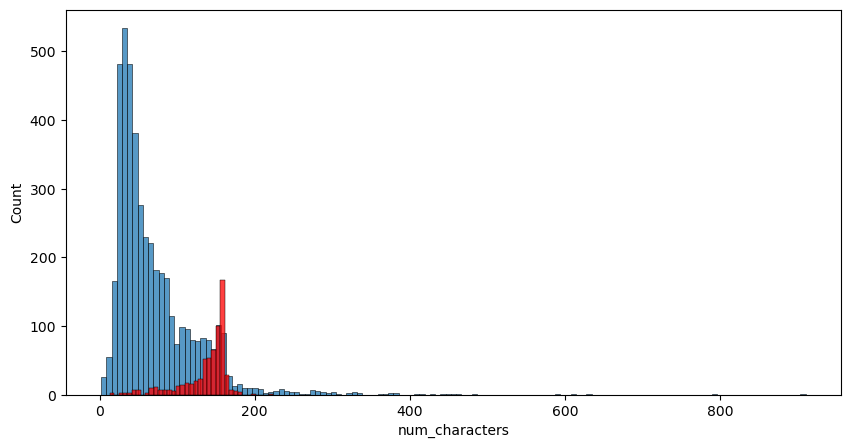

In [36]:
# plotting the number of characetr for comparision of ham and spam
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

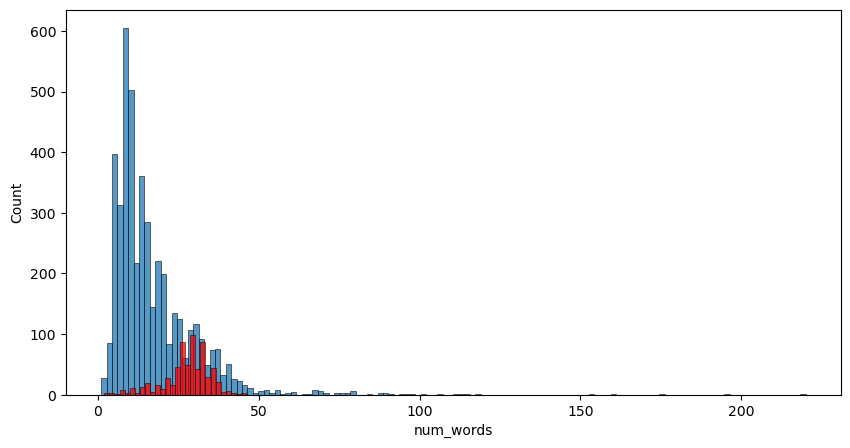

In [37]:
# plotting the number of words for comparision of ham and spam
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


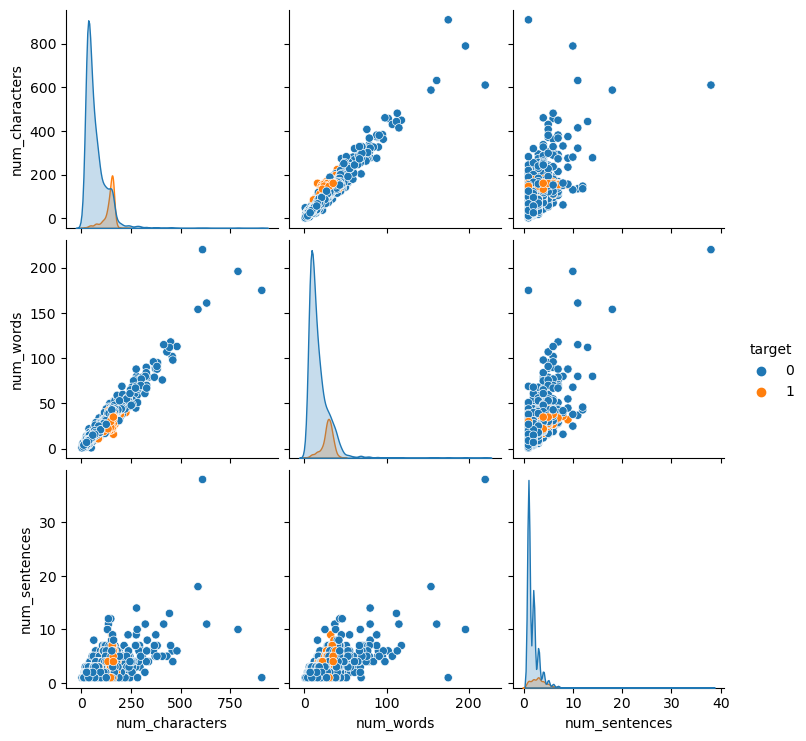

In [38]:
## to see the relationship between each of them like to see the relation of characeter with word, sentences etc 
#(i.e, pair comparision)
sns.pairplot(df,hue='target')

In [39]:
## checking the correlation in heat map
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


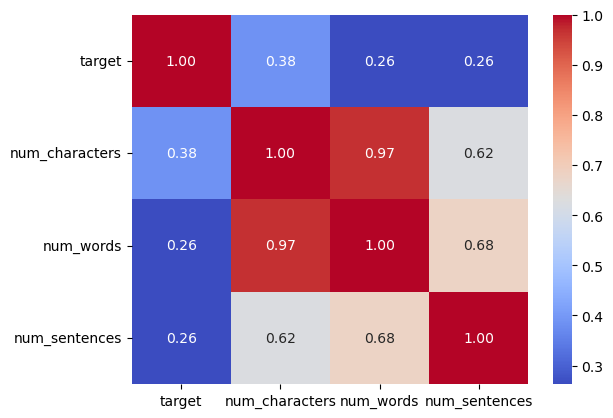

In [40]:
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

 ## 3.Data (Text) Pre-Processing
    #.conversion in lowercase
    #.Tokenization
    #.Removing special characters
    #.Removing stop words and punctuation
    #.Stemming (changing of words to the its original form)

In [41]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [42]:
import string
#string.punctuation

In [43]:
## Stemming (changing of words to the its original form)
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
def transform_text(text):
    text = text.lower() # Convert into the lowercase
    text = nltk.word_tokenize(text) # break the word in the text
    
    # running the loop to remove the special character (i.e to just keep alphabet and the numbers)
    A = []
    for i in text:
        if i.isalnum():
            A.append(i)
            
        text = A[:]
        A.clear()
         # running the loop to remove the stop words and punctuation
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                A.append(i)
        
        text = A[:]
        A.clear()
        
        for i in text:
            A.append(ps.stem(i))
        
    return " ".join(A)

In [45]:
# to check the above code is running
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [48]:
## creating word cloud where the most used word will be foucesd and display
#!pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
# converting all the transformed text into string using .astype(str)
# highlingh the spam words
#spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" ")) did the mistake in transformed_test function
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

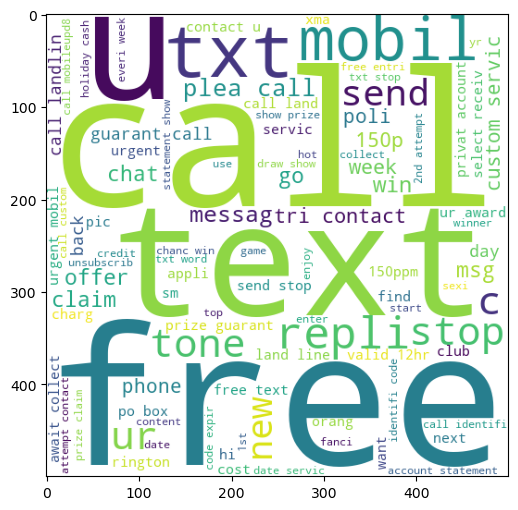

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
# converting all the transformed text into string using .astype(str)
# highlingh the ham words
#ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" "))did the mistake in transformed_test function
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

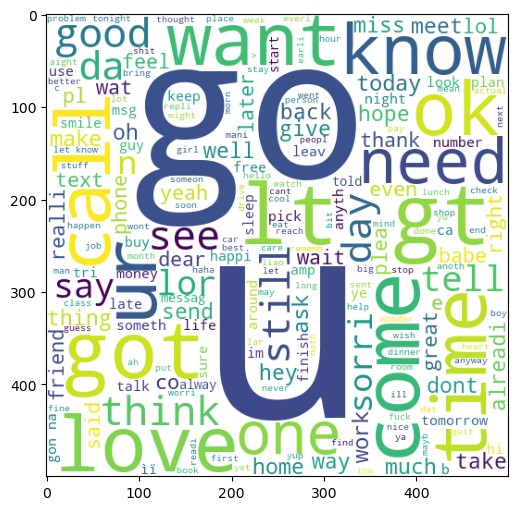

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
#spam_corpus = []

#for msg in df[df['target'] == 1]['transformed_text'].tolist():
 #   if isinstance(msg, str):  # Check if msg is a string
  #      for word in msg.split():
   #         spam_corpus.append(word)
    #elif isinstance(msg, list):  # Check if msg is a list
     #   spam_corpus.extend(msg)

In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9930

In [58]:
from collections import Counter
spam_corpus_dataframe = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Repetition of words'])
spam_corpus_dataframe

,Word,Repetition of words
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


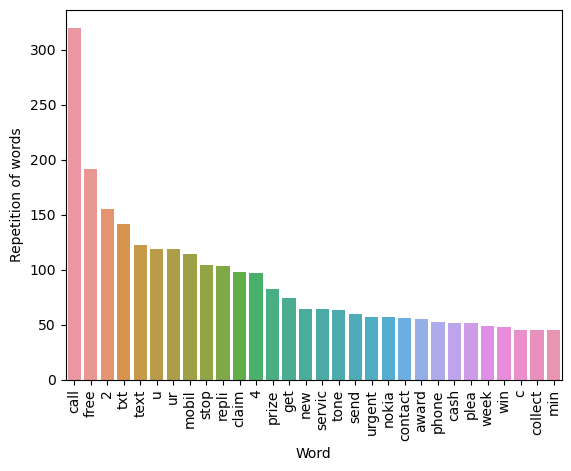

In [59]:
sns.barplot(x ='Word', y='Repetition of words', data=spam_corpus_dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
#ham_corpus = []

#for msg in df[df['target'] == 0]['transformed_text'].tolist():
 #   if isinstance(msg, str):  # Check if msg is a string
  #      for word in msg.split():
   #         ham_corpus.append(word)
    #elif isinstance(msg, list):  # Check if msg is a list
    #    ham_corpus.extend(msg)

In [61]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35296

In [63]:
ham_corpus_dataframe = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Repetition of words'])
ham_corpus_dataframe

,Word,Repetition of words
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


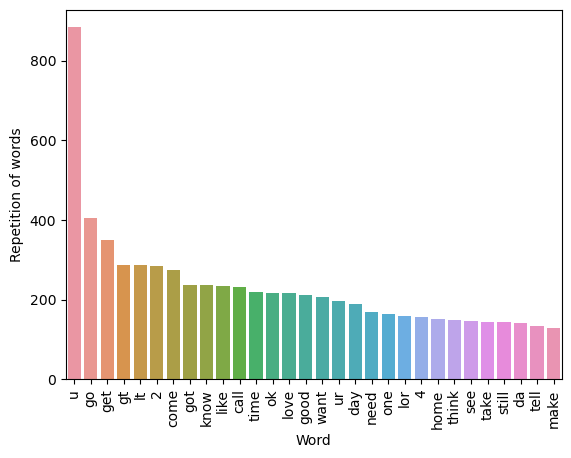

In [64]:
sns.barplot(x ='Word', y='Repetition of words', data=ham_corpus_dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000) # 2000 means it will vectorive the most used 2000 word.

In [67]:
# Using Count Vectorizer
#X = cv.fit_transform(df['transformed_text']).toarray() # to check with the counter vector

In [68]:
# Using TFIDF vectorizer
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
# using scaler for the improvement of the algorithm and cant use standerd scaler because it will give -ve vale 
# but naive bayes didn't accept the -ve value
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [70]:
# appending the num_character col to X. In order to check for the improvment of the model
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [71]:
 X.shape

(5169, 2000)

In [72]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
# importing all the naive bayes as we dont know the dataset
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
#gnb.fit(X_train,y_train)
#y_pred1 = gnb.predict(X_test)
#print(accuracy_score(y_test,y_pred1))
#print(confusion_matrix(y_test,y_pred1))
#print(precision_score(y_test,y_pred1))

In [78]:
#bnb.fit(X_train,y_train)
#y_pred3 = bnb.predict(X_test)
#print(accuracy_score(y_test,y_pred3))
#print(confusion_matrix(y_test,y_pred3))
#print(precision_score(y_test,y_pred3))

In [79]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [80]:
# Now with model check we have an option to go with BNB or MNB. And in this case precision score matter due to unbalance of
# data so i am going with TfidfVectorizer MNB tfidf --> MNB

In [81]:
# now bringing all the machine learning code into effect to compare them

In [82]:
# to install the xgboost module in the device or algorithm
# pip install xgboost

In [83]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [84]:
# creating all the object for all the module above
#svc = SVC(kernel='sigmoid', gamma=1.0)
#knc = KNeighborsClassifier()
#mnb = MultinomialNB()
#dtc = DecisionTreeClassifier(max_depth=5)
#lrc = LogisticRegression(solver='liblinear', penalty='l1')
#rfc = RandomForestClassifier(n_estimators=50, random_state=2)
#abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
#gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
# creating a dictionary where in keys there are algorithm name
#clfs = {
#    'SVC' : svc,
#    'KN' : knc, 
#    'NB': mnb, 
#    'DT': dtc, 
#    'LR': lrc, 
#    'RF': rfc, 
#    'AdaBoost': abc, 
#    'BgC': bc, 
#    'ETC': etc,
#    'GBDT':gbdt,
#    'xgb':xgb
#}

In [86]:
# creating a function as train classifier where i am givimg the train and test dataset where it can train the data set 

#def train_classifier(clf,X_train,y_train,X_test,y_test):
#    clf.fit(X_train,y_train)                                 # this line train this classifier in those data set 
#    y_pred = clf.predict(X_test)                             # finally calculate the accuracy, precission according to 
#    accuracy = accuracy_score(y_test,y_pred)                 # the classifier and the for those module
#    precision = precision_score(y_test,y_pred)
    
#    return accuracy,precision

In [87]:
# to check the above function work or not I run the function using support vector (SVC)
#train_classifier(svc,X_train,y_train,X_test,y_test)

In [88]:
#       creting the loop to run in the above dictionary where this will store all the accuracy 
#        and the precision value for each module according to their name
#
#accuracy_scores = []
#precision_scores = []

#for name,clf in clfs.items():
    
#    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#    print("For ",name)
#    print("Accuracy - ",current_accuracy)
#    print("Precision - ",current_precision)
    
#    accuracy_scores.append(current_accuracy)
#    precision_scores.append(current_precision)

In [89]:
# creating the above output of the accuracy and precision in dataframe and sorting by precision
#performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Original_Accuracy':accuracy_scores,'Original_Precision':precision_scores}).sort_values('Precision',ascending=False)

#performance_df

In [90]:
# from the above as well the top five are showing the best precision but the firswt one accuracy is too low
# and in this case precision will matter due to imbalance dataset so i am moving withNaive bayes because of its precision
# high and the accuracy is also not bad

In [91]:
# to plot the above data into the plot
#performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

#performance_df1

#sns.catplot(x = 'Algorithm', y='value', 
#             hue = 'variable',data=performance_df1, kind='bar',height=5)
#plt.ylim(0.5,1.0)
#plt.xticks(rotation='vertical')
#plt.show()

# model improve

In [92]:

# 1. Change the max_features parameter of TfIdf

In [93]:
# this will append the new data that comes from the output to improvement the model(i.e using max_feature = 3000)
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_2000':accuracy_scores,'Precision_max_ft_2000':precision_scores}).sort_values('Precision_max_ft_2000',ascending=False)
#new_df = performance_df.merge(temp_df,on='Algorithm')
#new_df

In [94]:
#2. Scaling minmax method
# this will append the new data that comes from the output to check improvement the model(i.e using scaling minmax method)
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [95]:
#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [96]:
#new_df_scaled

In [97]:
## By using scaling the accuracy wents more down in naive bayes and the precision also went down but mostly it didn't 
## chnage anything in other, So I planned not to go with scaling.

In [98]:
## trying to improve with the NUM-CHARACTERS column of dataset

In [99]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
#new_df_num_char = new_df_scaled.merge(temp_df,on='Algorithm')
#new_df_num_char

In [100]:
#new_df_num_char1 = pd.melt(new_df_num_char, id_vars = "Algorithm")

#new_df_num_char1

#sns.catplot(x = 'Algorithm', y='value', 
#             hue = 'variable',data=new_df_num_char1, kind='bar',height=7,)
#plt.ylim(0.5,1.0)
#plt.xticks(rotation='vertical')
#plt.show()

In [101]:
# finally with the comparison of these accuracy and precision I decided to go with tfid (Max_feature=3000) model
# now the model is prepared 

In [102]:
# Now the step is to create the pipe line for connecting the model and the website to check the user entered email is spam 
# ham

In [103]:
# for final setup of the model run the file 1 + to 2 and 3 and finally 4

In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))